### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

#### Independent variable: 
The independent variable in this experiment is whether _the word content_ and _the font color of the word_  are the same or different, in other words it is if the experiment is _congruent_ or _incongruent_
#### Dependent variable:
The dependent variable is the response time (RT) of the participant to identify the font color of the word.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

#### What is an appropriate set of hypotheses for this task?
H0 (Null Hypothesis): There is no difference in the means of the polulation response time under incongruent and congruent conditions, which can be mathematically represented as : 

    $$ H1: μ_{I} - μ_{C} = 0 $$

H1 (Alternate Hypothesis): The means of the population response time under the incongruent condition will be greater than the means under the congruent condition, which can be mathematically represented as :
    $$ H1: μ_{I} - μ_{C} > 0 $$
  

####  What kind of statistical test to perform?
- Based on above, we can conclude that a one-tailed-dependent sample t-test comparing the difference in means (the response time to identify the colors for congruent and incongruent words) should be performed.

- By performing this one-tailed test, we aim to find out whether it was just a matter of chance that the mean response time taken to identify the color of the congruent words was significantly less than that of incongruent words. Or, is there enough evidence to infer that the mean response time for congruent words will be less than that of incongruent words for the entire population and not only the sample data.

- As we don’t know the population parameters (µ & σ) and we have paired sample data, a t-test for “within-subject designs” seems to be the correct choice. In this case, the within-subject design is two-conditions (each subject assigned 2 conditions in random order). 

- Additionally, we only need to perform a one-tailed dependent t-test for paired samples as we are only interested in finding out whether the color of congruent words are easier to identify as compared to incongruent words or not.

The dependent sample t-test main assumptions:

- The dependent variable must be continuous (in our case the time it takes to read the words).
- The observations are independent of one another.
- The dependent variable should be approximately normally distributed.
- The dependent variable should not contain any outliers.

For our data we have: 
- Confidence level 99% (alpha = 0.01) 
- Degrees of freedom 23 ( = 24 - 1 ) 
- Resulting t_critical = -2.5


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
#Importing some needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
#Reading the data
df = pd.read_csv('stroopdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [4]:
# Add difference between Congruent and Incongruent time to dataframe
df['Difference'] = df['Incongruent'] - df['Congruent']
print(df.sort_values(by='Difference', ascending=False))

    Congruent  Incongruent  Difference
19     12.369       34.288      21.919
14     18.200       35.255      17.055
9      14.480       26.282      11.802
2       9.564       21.214      11.650
8       9.401       20.762      11.361
20     12.944       23.894      10.950
15     12.130       22.158      10.028
6      14.692       24.572       9.880
17     10.639       20.429       9.790
5      12.238       20.878       8.640
7       8.987       17.394       8.407
4      14.669       22.803       8.134
0      12.079       19.278       7.199
3       8.630       15.687       7.057
16     18.495       25.139       6.644
18     11.344       17.425       6.081
23     16.004       21.157       5.153
21     14.233       17.960       3.727
13     16.929       20.330       3.401
11     15.298       18.644       3.346
12     15.073       17.510       2.437
22     19.710       22.058       2.348
10     22.328       24.524       2.196
1      16.791       18.741       1.950


In [5]:
df.describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


- The study contains 24 pairs of observations for Congruent and Incongruent reading time. 
- The average time for reading congruent color names is 14 seconds, while for incongruent color names this was 22. 
- The minimum difference in reading times was close to 2 seconds while the maximum difference was nearly 22 seconds. 
- The standard deviation whithin the difference was 4.86 seconds.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

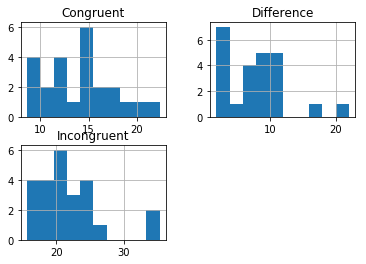

In [6]:
# Histograms Congruent, Incongruent, Difference
df.hist();

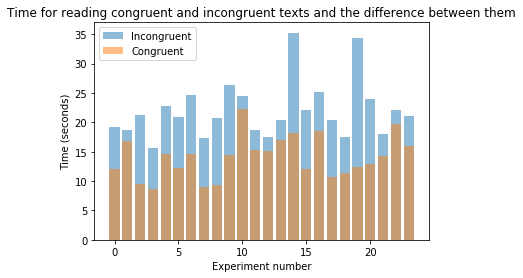

In [28]:
# Bar chart for Congruent, Incongruent
plt.bar(df.index,alpha = 0.5, height = df['Incongruent'], label = 'Incongruent')
plt.bar(df.index,alpha = 0.5, height = df['Congruent'], label = 'Congruent')
plt.title('Time for reading congruent and incongruent texts and the difference between them')
plt.ylabel('Time (seconds)')
plt.xlabel('Experiment number')
plt.legend()

Text(0.5,0,'Experiment')

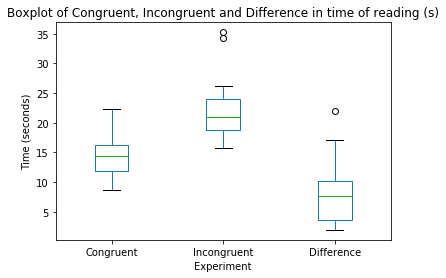

In [8]:
# Boxplot for Congruent, Incongruent, Difference
df.plot(kind='box',title="Boxplot of Congruent, Incongruent and Difference in time of reading (s)")
plt.ylabel('Time (seconds)')
plt.xlabel('Experiment')

The plots show that the incongruence words shows a higher variability in time taken to identify the colors and that the mean response time taken is also higher than in the congruent words situation.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [17]:
# Perform the statistical test here
sample_size= 23
stats.t.ppf(0.975, sample_size)

# Calculates the T-test on TWO RELATED samples of scores, a and b.
t ,p_value = stats.ttest_rel(df['Congruent'], df['Incongruent'])

print("t_calculated = " + str(t))
print("P value = " + str(p_value))

t_calculated = -8.02070694411
P value = 4.10300058571e-08


- The results show that t_calculed of -8.02 is much lower than the t_critical established at question 2 (t_critical=-2.5). Thus, the t_calculated is in the critical region and the NULL hypothesis(H0) is rejected. 
- This means that the difference in time to identify the colors is statistically different in the case of congruence versus incongruence words.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The interference between the different information (what the words say and the color of the words) the brain receives causes a a latency in response time for the brain. There are two theories that may explain the Stroop effect:
- Speed of Processing Theory: the interference occurs because words are read faster than colors are identified. 
- Selective Attention Theory: the interference occurs because identifying colors requires more attention than reading words.

A similar task with a similar effect would be the time it takes to complete an Udacity project at home in a quiet environment versus the time it takes for the similar task to complete in a busy cafe.

#### Refferences:
- https://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/
- https://faculty.washington.edu/chudler/words.html
- https://www.cognifit.com/science/cognitive-skills/processing-speed
- https://www.psytoolkit.org/lessons/stroop.html